# Extracting frames from Video

In [1]:
import cv2
import numpy as np
import os

def extract_frames(video_path, num_frames, output_folder):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    # Get total number of frames in the video
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Generate random frame indices
    frame_indices = np.random.choice(range(total_frames), size=num_frames, replace=False)
    
    # Create output directory if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Extract frames
    count = 0
    for i in frame_indices:
        # Set the current frame position of the video
        cap.set(cv2.CAP_PROP_POS_FRAMES, i)
        ret, frame = cap.read()
        if ret:
            # Save the frame as an image file
            cv2.imwrite(os.path.join(output_folder, f"frame_{i}.jpg"), frame)
#             print(f"Extracted Frame {i}")
            count += 1
        else:
            print(f"Failed to extract frame at index {i}")

    print(f"Total extracted frames: {count}")
    # Release the video capture object
    cap.release()



In [2]:
# Example usage
real_video_path = input("Enter the real video path")
spoof_video_path = input("Enter the spoof video path")
num_frames = int(input("Enter the no. of samples needed for traning"))  # Number of random frames to extract

# Forsavinfg both the real and fake videos
output_folder = input("Enter the output folder path")
extract_frames(real_video_path, num_frames, os.path.join(output_folder,"live"))
extract_frames(spoof_video_path, num_frames, os.path.join(output_folder,"Spoof"))

Enter the real video path/Users/avinash/Desktop/Facial Recognition/resources/real_video.mov
Enter the spoof video path/Users/avinash/Desktop/Facial Recognition/resources/spoof_video.mov
Enter the no. of samples needed for traning50
Enter the output folder path/Users/avinash/Desktop/Facial Recognition/resources/output
Total extracted frames: 50
Total extracted frames: 50


=======================

In [1]:
import os

import cv2


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
/
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import Dense, Flatten

In [2]:
# conv_bas = ResNet50(weights='imagenet', include_top=False, )

In [3]:
path = "/Users/avinash/Downloads/Teachable_data"

In [4]:
for filename in os.listdir(path):
    if filename == '.DS_Store':
        continue
    folder = os.path.join(path,filename)
    print("folder -",folder)

folder - /Users/avinash/Downloads/Teachable_data/train
folder - /Users/avinash/Downloads/Teachable_data/test_NO
folder - /Users/avinash/Downloads/Teachable_data/validation


In [5]:
path = "/Users/avinash/Downloads/Teachable_data"

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(rescale=1/255 ,
                                   rotation_range=0.1 ,
                                   width_shift_range= 0.2,
                                   height_shift_range= 0.2,
                                   shear_range= 0.1,
                                   zoom_range= 0.3,
                                   horizontal_flip= True,
                                   fill_mode= 'nearest')

In [8]:
train_generator = train_datagen.flow_from_directory("/Users/avinash/Downloads/Teachable_data/train",
                                                      target_size=(400, 600) ,
                                                      batch_size=10 ,
                                                      class_mode='binary')

Found 1477 images belonging to 2 classes.


In [9]:
# fig, axes = plt.subplots(4, 10, figsize=(20,20))
# print("shape of axes -",axes.shape)
# print("axes -",axes)

In [10]:
# axes = axes.flatten()
# print("shape of axes -",axes.shape)

# axes

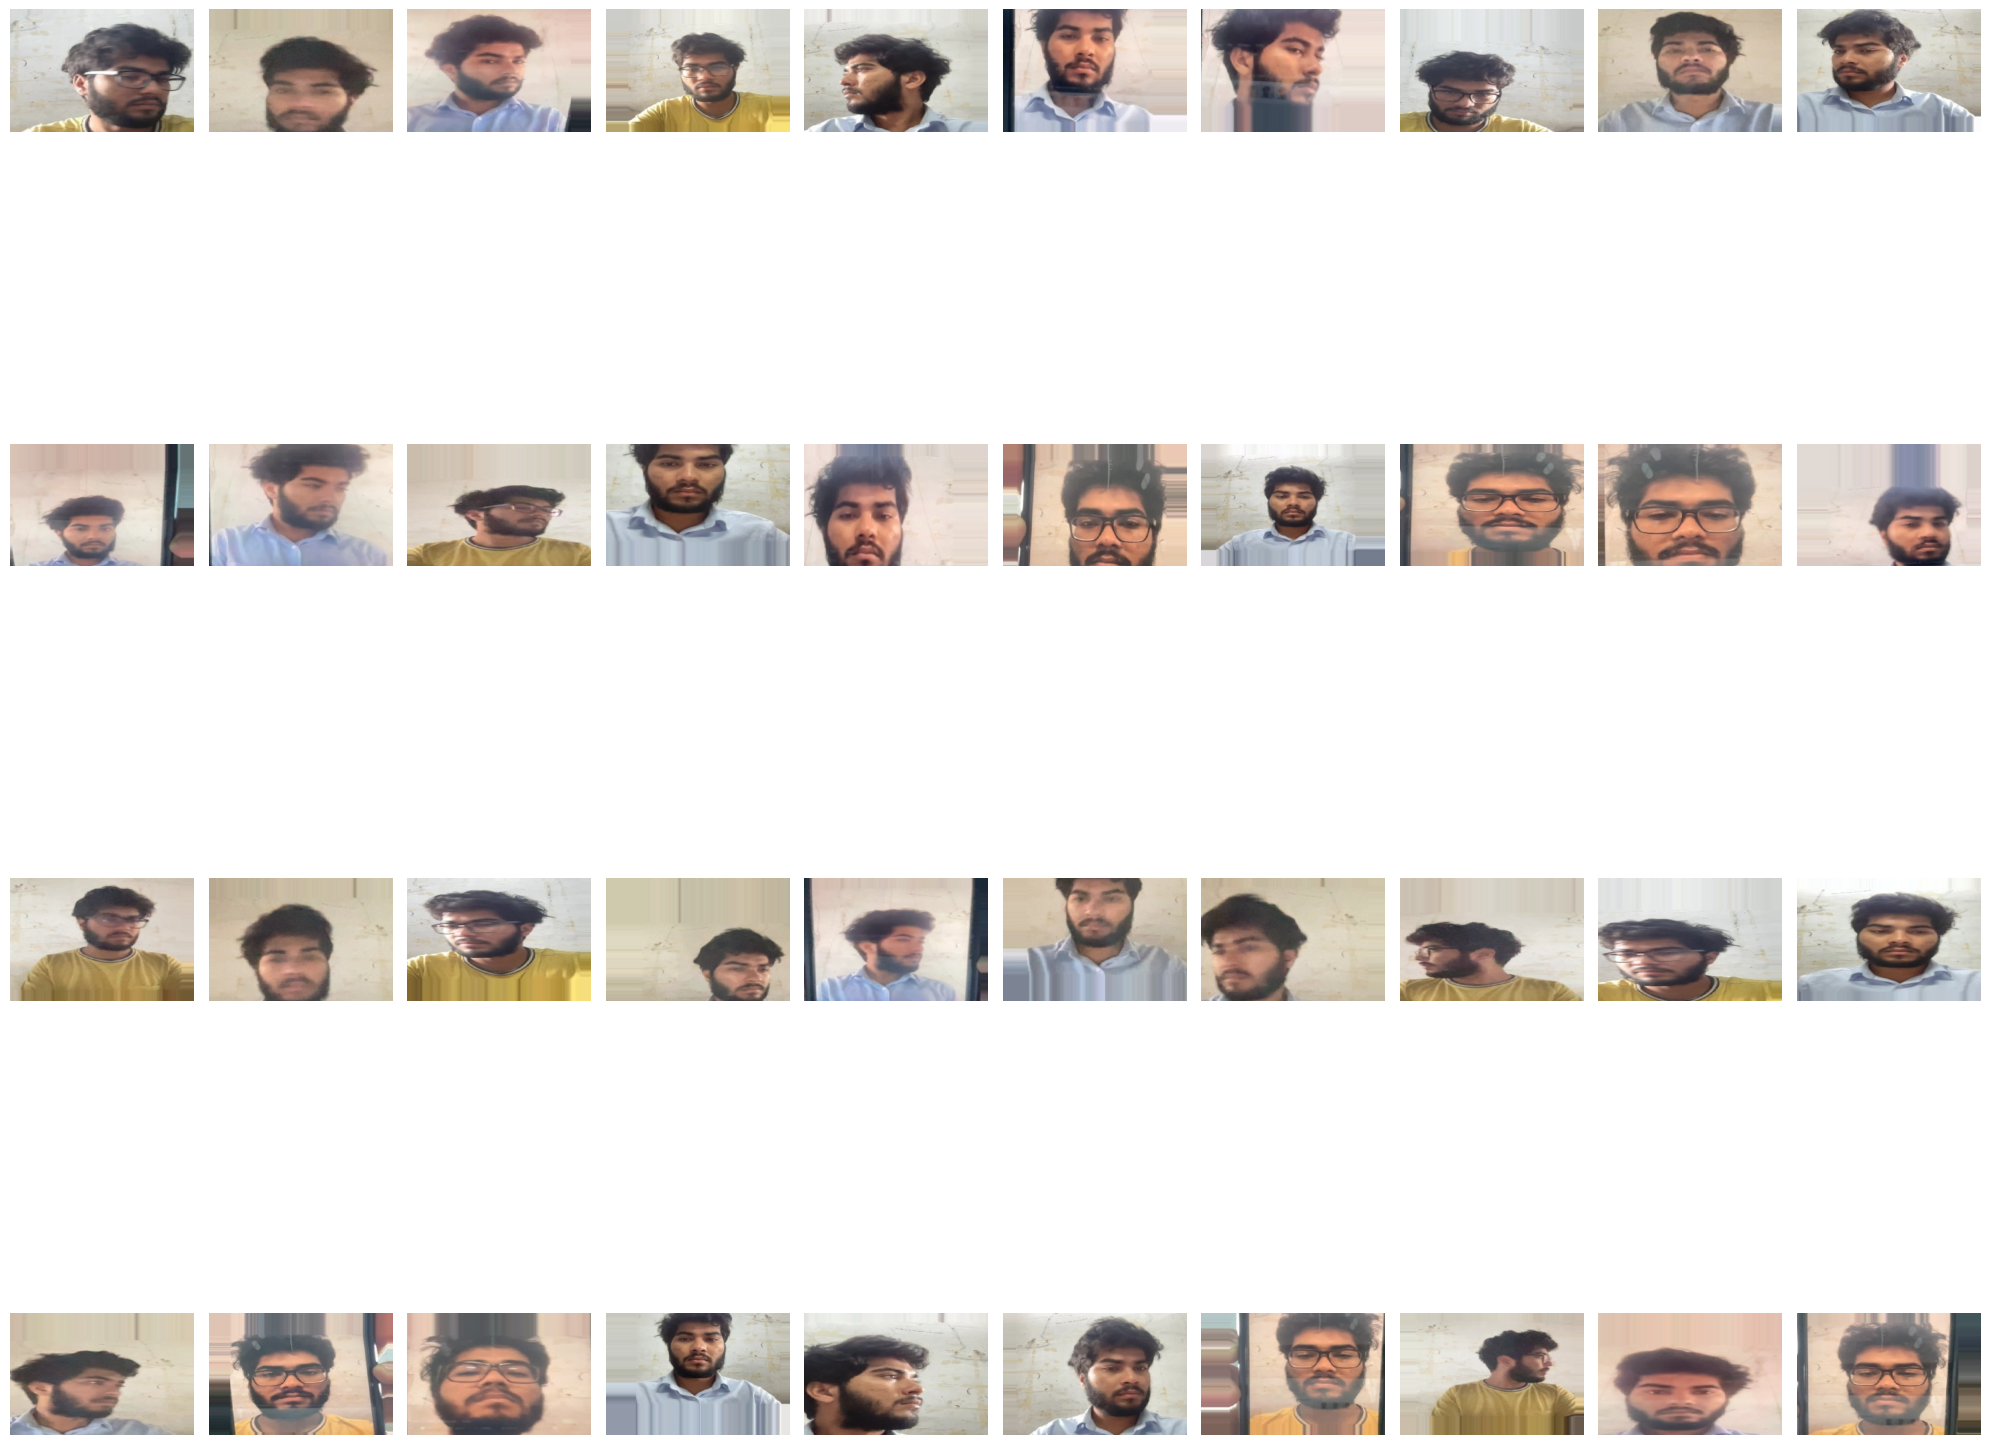

In [11]:
# Function to plot images
def plot_images(images_arr):
    fig, axes = plt.subplots(4, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Generate and display images
images = [train_generator.next()[0][0] for _ in range(40)]
plot_images(images)


In [12]:
path = "/Users/avinash/Downloads/Teachable_data"

In [13]:
train_dir = os.path.join(path,'train')
validation_dir = os.path.join(path,'validation')

In [14]:
train_dir

'/Users/avinash/Downloads/Teachable_data/train'

In [15]:
validation_dir

'/Users/avinash/Downloads/Teachable_data/validation'

In [16]:
# Create a data generator for training and validation sets
train_datagen = ImageDataGenerator(
    rescale=1./255,   # Normalize pixel values
    rotation_range=20, # Randomly rotate images
    width_shift_range=0.2, # Randomly shift images horizontally
    height_shift_range=0.2, # Randomly shift images vertically
    shear_range=0.2,   # Randomly shear images
    zoom_range=0.2,    # Randomly zoom in on images
    horizontal_flip=True, # Randomly flip images horizontally
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255) # Only rescaling for validation data

# Load images from directory and apply transformations
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(400, 600),  # Resize images to 224x224
    batch_size=32,
    class_mode='binary'  # binary labels
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(400, 600),
    batch_size=32,
    class_mode='binary'
)

Found 1477 images belonging to 2 classes.
Found 308 images belonging to 2 classes.


In [17]:
train_generator.class_indices

{'Liveness': 0, 'Spoofing': 1}

In [18]:
import tensorflow as tf

from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [19]:
conv_base = MobileNetV2(weights='imagenet', 
                   include_top=False, 
                   input_shape=(400, 600,3))

In [20]:
conv_base.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 400, 600, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 200, 300, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 200, 300, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 200, 300, 32)         0         ['bn_Conv1[

 block_3_expand_relu (ReLU)  (None, 100, 150, 144)        0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 101, 151, 144)        0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 50, 75, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 50, 75, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 25, 38, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 25, 38, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 25, 38, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 25, 38, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 25, 38, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 25, 38, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 25, 38, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 25, 38, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 25, 38, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 27, 39, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 13, 19, 576)          5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 13, 19, 960)          3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 13, 19, 960)          0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 13, 19, 320)          307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [21]:
conv_base.trainable = False

In [22]:
from keras import Sequential
from keras.layers import Dense, Flatten

In [23]:
# Defining the new model

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 13, 19, 1280)      2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 316160)            0         
                                                                 
 dense (Dense)               (None, 256)               80937216  
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 83195457 (317.37 MB)
Trainable params: 80937473 (308.75 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [25]:
model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [ ]:
model.fit(train_generator, epochs=6)

Epoch 1/6
47/47 [==============================] - 241s 5s/step - loss: 6.0130 - accuracy: 0.9039
Epoch 2/6
47/47 [==============================] - 165s 3s/step - loss: 0.2360 - accuracy: 0.9905
Epoch 3/6
47/47 [==============================] - 220s 5s/step - loss: 0.0883 - accuracy: 0.9953
Epoch 4/6
47/47 [==============================] - 269s 6s/step - loss: 0.3041 - accuracy: 0.9926
Epoch 5/6
 6/47 [==>...........................] - ETA: 3:11 - loss: 0.2012 - accuracy: 0.9818

In [ ]:
model.save('mobilenet_v2/my_model.h5')

# Testing

In [1]:
import os

import cv2


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import Dense, Flatten

In [2]:
from tensorflow.keras.models import load_model


In [4]:
model = load_model('/Users/avinash/Desktop/invertedkeras_model.h5', compile=False)

In [5]:
from tensorflow.keras.preprocessing import image


In [6]:
# # detecting face

# opencv_dnn_model = cv2.dnn.readNetFromCaffe(prototxt="detection_model/deploy.prototxt",                      
#                                      caffeModel="detection_model/Widerface-RetinaFace.caffemodel")
# opencv_dnn_model

In [7]:
def preprocess_frame(frame):
    # Resize the image to match the input size of the model
    img = cv2.resize(frame, (224, 224))
    
    # Convert the image from BGR (OpenCV default) to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Convert to a float32 array and normalize
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    
    return img_array


In [8]:
# Start video capture
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        print("Error: Can't receive frame (stream end?). Exiting ...")
        break

    resized_frame = cv2.resize(frame, (224, 224))
    print("resized_frame.shape ->", resized_frame.shape)
    
    # Preprocess the frame
    processed_frame = preprocess_frame(resized_frame)
    print("processed_frame.shape ->",processed_frame.shape)

    # Predict using the pre-trained model
    predictions = model.predict(processed_frame)
    
    # -------------------------------------------------------------------------
    # Face-detection
#     h,w = resized_frame.shape[:2]
#     # blob = cv2.dnn.blobFromImage(image, scalefactor=1.0, size, mean, swapRB=True)
#     blob = cv2.dnn.blobFromImage(resized_frame, scalefactor=1.0, size=(224,224), mean=(104.0, 177.0, 123.0), swapRB=True)
    
#     opencv_dnn_model.setInput(blob)
#     detections = opencv_dnn_model.forward()
#     # Draw rectangles around detected faces
#     for i in range(0, detections.shape[2]):
#         confidence = detections[0, 0, i, 2]
#         if confidence > 0.5:  # Confidence threshold
#             box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
#             (startX, startY, endX, endY) = box.astype("int")
#             cv2.rectangle(resized_frame, (startX, startY), (endX, endY), (0, 255, 0), 2)
    

#     (h, w) = frame.shape[:2]
#     blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0,
#                                  (300, 300), (104.0, 177.0, 123.0))

#     # Detect faces
#     opencv_dnn_model.setInput(blob)
#     detections = opencv_dnn_model.forward()
    
#     # Draw rectangles around detected faces
#     for i in range(0, detections.shape[2]):
#         confidence = detections[0, 0, i, 2]
#         if confidence > 0.5:  # Confidence threshold
#             box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
#             (startX, startY, endX, endY) = box.astype("int")
#             cv2.rectangle(resized_frame, (startX, startY), (endX, endY), (0, 255, 0), 2)

            

    # -------------------------------------------------------------------------
    
    
    print("--------------------",predictions)
    predicted_class = 'Spoof' if predictions[0][0] > 0.7 else 'Live'

    # Display the resulting frame with prediction
    cv2.putText(resized_frame, f'Predicted: {predicted_class}', (10, 30), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
    cv2.imshow('frame', resized_frame)

    # Press 'q' on the keyboard to exit
    if cv2.waitKey(1) == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)


resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 467ms/step
-------------------- [[6.194289e-06 9.999938e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 18ms/step
-------------------- [[3.6663832e-06 9.9999630e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 17ms/step
-------------------- [[9.154871e-06 9.999908e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 17ms/step
-------------------- [[1.2923397e-05 9.9998713e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 20ms/step
-------------------- [[1.105308e-05 9.999889e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [=

1/1 [==============================] - 0s 14ms/step
-------------------- [[2.7075963e-05 9.9997294e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 14ms/step
-------------------- [[3.8993905e-05 9.9996102e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 15ms/step
-------------------- [[1.1626131e-05 9.9998832e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 14ms/step
-------------------- [[1.4961306e-05 9.9998498e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 14ms/step
-------------------- [[6.661057e-06 9.999933e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 13ms/step
-------------------- [[6.03050

1/1 [==============================] - 0s 14ms/step
-------------------- [[1.0942827e-06 9.9999893e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 14ms/step
-------------------- [[2.2463348e-06 9.9999774e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 13ms/step
-------------------- [[1.9612703e-06 9.9999809e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 15ms/step
-------------------- [[2.331365e-06 9.999976e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 14ms/step
-------------------- [[1.2593647e-06 9.9999869e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 14ms/step
-------------------- [[1.05075

1/1 [==============================] - 0s 13ms/step
-------------------- [[1.1360268e-07 9.9999988e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 18ms/step
-------------------- [[1.2168765e-07 9.9999988e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 13ms/step
-------------------- [[1.4722985e-06 9.9999857e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 15ms/step
-------------------- [[2.9164124e-08 1.0000000e+00]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 15ms/step
-------------------- [[3.8571685e-08 1.0000000e+00]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 16ms/step
-------------------- [[4.065

1/1 [==============================] - 0s 13ms/step
-------------------- [[5.703098e-06 9.999943e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 15ms/step
-------------------- [[2.00188e-06 9.99998e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 13ms/step
-------------------- [[1.33824915e-05 9.99986649e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 14ms/step
-------------------- [[4.0231057e-06 9.9999595e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 14ms/step
-------------------- [[7.8596076e-06 9.9999213e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 14ms/step
-------------------- [[1.4137396

1/1 [==============================] - 0s 14ms/step
-------------------- [[5.1360744e-06 9.9999487e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 13ms/step
-------------------- [[3.1005195e-05 9.9996901e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 14ms/step
-------------------- [[3.1242016e-06 9.9999690e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 13ms/step
-------------------- [[7.9579195e-06 9.9999201e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 13ms/step
-------------------- [[1.5671878e-06 9.9999845e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 14ms/step
-------------------- [[2.442

1/1 [==============================] - 0s 13ms/step
-------------------- [[1.714051e-09 1.000000e+00]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 13ms/step
-------------------- [[2.2575739e-08 1.0000000e+00]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 13ms/step
-------------------- [[7.6324824e-08 9.9999988e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 14ms/step
-------------------- [[1.1265925e-08 1.0000000e+00]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 13ms/step
-------------------- [[3.8022496e-10 1.0000000e+00]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 13ms/step
-------------------- [[4.35166

1/1 [==============================] - 0s 15ms/step
-------------------- [[7.740561e-08 9.999999e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 13ms/step
-------------------- [[3.9972920e-07 9.9999964e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 14ms/step
-------------------- [[1.529324e-07 9.999999e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 14ms/step
-------------------- [[1.9088530e-07 9.9999976e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 13ms/step
-------------------- [[1.754002e-06 9.999982e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 14ms/step
-------------------- [[7.5026037e-

1/1 [==============================] - 0s 14ms/step
-------------------- [[1.9001349e-07 9.9999976e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 14ms/step
-------------------- [[3.3407196e-07 9.9999964e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 14ms/step
-------------------- [[1.6810599e-06 9.9999833e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 13ms/step
-------------------- [[2.1730052e-06 9.9999785e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 14ms/step
-------------------- [[4.2375013e-06 9.9999571e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 13ms/step
-------------------- [[3.030

1/1 [==============================] - 0s 13ms/step
-------------------- [[1.2193781e-06 9.9999881e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 15ms/step
-------------------- [[1.575371e-07 9.999999e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 15ms/step
-------------------- [[1.0320663e-07 9.9999988e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 14ms/step
-------------------- [[3.6138053e-07 9.9999964e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 15ms/step
-------------------- [[5.106021e-08 1.000000e+00]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 14ms/step
-------------------- [[1.2736324

1/1 [==============================] - 0s 14ms/step
-------------------- [[1.0065021e-06 9.9999905e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 14ms/step
-------------------- [[3.8902917e-07 9.9999964e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 14ms/step
-------------------- [[5.3348816e-07 9.9999952e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 13ms/step
-------------------- [[5.0754454e-07 9.9999952e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 13ms/step
-------------------- [[1.4960972e-07 9.9999988e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 14ms/step
-------------------- [[1.313

1/1 [==============================] - 0s 15ms/step
-------------------- [[1.050353e-06 9.999989e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 13ms/step
-------------------- [[4.997225e-07 9.999995e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 15ms/step
-------------------- [[3.0785014e-07 9.9999964e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 14ms/step
-------------------- [[1.1705996e-06 9.9999881e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 16ms/step
-------------------- [[3.1885577e-07 9.9999964e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 14ms/step
-------------------- [[1.5406176

1/1 [==============================] - 0s 14ms/step
-------------------- [[1.0421583e-06 9.9999893e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 14ms/step
-------------------- [[1.0883504e-06 9.9999893e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 14ms/step
-------------------- [[4.5228816e-07 9.9999952e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 14ms/step
-------------------- [[2.1185319e-06 9.9999785e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 15ms/step
-------------------- [[8.2202229e-07 9.9999917e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 14ms/step
-------------------- [[1.318

1/1 [==============================] - 0s 13ms/step
-------------------- [[1.3970418e-05 9.9998605e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 14ms/step
-------------------- [[8.875324e-06 9.999912e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 14ms/step
-------------------- [[1.7274418e-05 9.9998271e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 13ms/step
-------------------- [[2.0283487e-05 9.9997973e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 14ms/step
-------------------- [[1.4721143e-05 9.9998534e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 13ms/step
-------------------- [[3.12851

1/1 [==============================] - 0s 14ms/step
-------------------- [[3.4080301e-06 9.9999654e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 14ms/step
-------------------- [[1.1362515e-05 9.9998868e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 14ms/step
-------------------- [[5.5178392e-05 9.9994481e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 13ms/step
-------------------- [[1.9550480e-05 9.9998045e-01]]
resized_frame.shape -> (224, 224, 3)
processed_frame.shape -> (1, 224, 224, 3)
1/1 [==============================] - 0s 13ms/step
-------------------- [[1.5068543e-05 9.9998498e-01]]


-1

In [30]:
# import os

# # Set the directory containing the files you want to rename
# directory = '/Users/avinash/Downloads/Teachable_data/test/Spoofing'

# # List all files in the directory
# files = os.listdir(directory)

# # Define the renaming pattern
# new_name_pattern = 'test_{}.jpg'

# # Iterate through the files and rename them
# for i, file in enumerate(files):
#     # Construct the new file name
#     new_name = new_name_pattern.format(i+1)
    
#     # Get the full path of the file
#     old_path = os.path.join(directory, file)
#     new_path = os.path.join(directory, new_name)
    
#     # Rename the file
#     os.rename(old_path, new_path)
    
#     print(f'Renamed "{file}" to "{new_name}"')


# Final Code

In [ ]:
import os

import cv2


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt()
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import Dense, Flatten


# path = "/Users/avinash/Downloads/Teachable_data"

path = input("Enter the folder path contaning both the *-train-* anbd *-validation-* folder")

for filename in os.listdir(path):
    if filename == '.DS_Store':
        continue
    folder = os.path.join(path,filename)
    print("folder -",folder)


from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_dir = os.path.join(path,'train')
validation_dir = os.path.join(path,'validation')


# Create a data generator for training and validation sets
train_datagen = ImageDataGenerator(
    rescale=1./255,   # Normalize pixel values
    rotation_range=20, # Randomly rotate images
    width_shift_range=0.2, # Randomly shift images horizontally
    height_shift_range=0.2, # Randomly shift images vertically
    shear_range=0.2,   # Randomly shear images
    zoom_range=0.2,    # Randomly zoom in on images
    horizontal_flip=True, # Randomly flip images horizontally
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255) # Only rescaling for validation data

# Load images from directory and apply transformations
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32,
    class_mode='binary'  # binary labels
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


# ====================================== Training ======================================


import tensorflow as tf

from tensorflow.keras.applications.resnet50 import ResNet50


conv_base = ResNet50(weights='imagenet', 
                   include_top=False, 
                   input_shape=(224, 224,3))



conv_base.trainable = False



from keras import Sequential
from keras.layers import Dense, Flatten


model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# model.summary()



model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])


model.fit(train_generator, epochs=50)


save_model_path = input("Enter the path to save the model")
model.save(save_model_path)




# ====================================== Testing ======================================



import os

import cv2


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import Dense, Flatten


from tensorflow.keras.models import load_model


# load the model
model_path = input("Enter the path of model")
model = load_model(model_path)


from tensorflow.keras.preprocessing import image



# # detecting face

# opencv_dnn_model = cv2.dnn.readNetFromCaffe(prototxt="detection_model/deploy.prototxt",                      
#                                      caffeModel="detection_model/Widerface-RetinaFace.caffemodel")
# opencv_dnn_model




def preprocess_frame(frame):
    # Resize the image to match the input size of the model
    img = cv2.resize(frame, (224, 224))
    
    # Convert the image from BGR (OpenCV default) to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Convert to a float32 array and normalize
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    
    return img_array



# Start video capture
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        print("Error: Can't receive frame (stream end?). Exiting ...")
        break

    resized_frame = cv2.resize(frame, (224, 224))
    print("resized_frame.shape ->", resized_frame.shape)
    
    # Preprocess the frame
    processed_frame = preprocess_frame(resized_frame)
    print("processed_frame.shape ->",processed_frame.shape)

    # Predict using the pre-trained model
    predictions = model.predict(processed_frame)
    
    # -------------------------------------------------------------------------
    # Face-detection
#     h,w = resized_frame.shape[:2]
#     # blob = cv2.dnn.blobFromImage(image, scalefactor=1.0, size, mean, swapRB=True)
#     blob = cv2.dnn.blobFromImage(resized_frame, scalefactor=1.0, size=(224,224), mean=(104.0, 177.0, 123.0), swapRB=True)
    
#     opencv_dnn_model.setInput(blob)
#     detections = opencv_dnn_model.forward()
#     # Draw rectangles around detected faces
#     for i in range(0, detections.shape[2]):
#         confidence = detections[0, 0, i, 2]
#         if confidence > 0.5:  # Confidence threshold
#             box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
#             (startX, startY, endX, endY) = box.astype("int")
#             cv2.rectangle(resized_frame, (startX, startY), (endX, endY), (0, 255, 0), 2)
    

#     (h, w) = frame.shape[:2]
#     blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0,
#                                  (300, 300), (104.0, 177.0, 123.0))

#     # Detect faces
#     opencv_dnn_model.setInput(blob)
#     detections = opencv_dnn_model.forward()
    
#     # Draw rectangles around detected faces
#     for i in range(0, detections.shape[2]):
#         confidence = detections[0, 0, i, 2]
#         if confidence > 0.5:  # Confidence threshold
#             box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
#             (startX, startY, endX, endY) = box.astype("int")
#             cv2.rectangle(resized_frame, (startX, startY), (endX, endY), (0, 255, 0), 2)

            

    # -------------------------------------------------------------------------
    
    
    print("--------------------",predictions)
    predicted_class = 'Spoof' if predictions[0][0] > 0.7 else 'Live'

    # Display the resulting frame with prediction
    cv2.putText(resized_frame, f'Predicted: {predicted_class}', (10, 30), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
    cv2.imshow('frame', resized_frame)

    # Press 'q' on the keyboard to exit
    if cv2.waitKey(1) == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)










## Teachable testing code

In [2]:
# from keras.models import load_model  # TensorFlow is required for Keras to work
# import cv2  # Install opencv-python
# import numpy as np

# # Disable scientific notation for clarity
# np.set_printoptions(suppress=True)

# # Load the model
# model = load_model("/Users/avinash/Desktop/converted_keras/keras_model.h5", compile=False)

# # Load the labels
# class_names = open("/Users/avinash/Desktop/converted_keras/labels.txt", "r").readlines()

# # CAMERA can be 0 or 1 based on default camera of your computer
# camera = cv2.VideoCapture(0)

# while True:
#     # Grab the webcamera's image.
#     ret, image = camera.read()

#     # Resize the raw image into (224-height,224-width) pixels
#     image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)

#     # Make the image a numpy array and reshape it to the models input shape.
#     new_image = np.asarray(image, dtype=np.float32).reshape(1, 224, 224, 3)

#     # Normalize the image array
#     new_image = (new_image / 127.5) - 1

#     # Predicts the model
#     prediction = model.predict(new_image)
#     index = np.argmax(prediction)
#     class_name = class_names[index]
#     confidence_score = prediction[0][index]
    
#     cv2.putText(image, f"{class_name[2:]}", (20,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
#     # Show the image in a window
#     cv2.imshow("Webcam Image", image)

#     # Print prediction and confidence score
#     print("Class:", class_name[2:], end="")
#     print("Confidence Score:", str(np.round(confidence_score * 100))[:-2], "%")

#     # Listen to the keyboard for presses.
#     keyboard_input = cv2.waitKey(1)

#     # 27 is the ASCII for the esc key on your keyboard.
#     if keyboard_input == 27:
#         break

# camera.release()
# cv2.destroyAllWindows()
# cv2.waitKey(1)
# cv2.waitKey(1)
# cv2.waitKey(1)
# cv2.waitKey(1)



1/1 [==============================] - 1s 579ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 16ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 14ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 15ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 15ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 15ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 14ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 13ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 14ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 14ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 14ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [===============

1/1 [==============================] - 0s 14ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 13ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 14ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 13ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 13ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 13ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 13ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 13ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 13ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 15ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 13ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [================

1/1 [==============================] - 0s 15ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 21ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 13ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 16ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 15ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 13ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 14ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 13ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 13ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 14ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 14ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [================

1/1 [==============================] - 0s 14ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 14ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 13ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 13ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 13ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 13ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 13ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 12ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 14ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 13ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 12ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [================

1/1 [==============================] - 0s 15ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 13ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 14ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 14ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 13ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 14ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 14ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 14ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 14ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 13ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 13ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [================

1/1 [==============================] - 0s 14ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 15ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 13ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 13ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 14ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 13ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 13ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 14ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 14ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 13ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [==============================] - 0s 14ms/step
Class: Spoof
Confidence Score: 100 %
1/1 [================

-1

/Users/avinash/Desktop/model_may8_536.h5

In [7]:
import cv2
import numpy as np
import tensorflow as tf
import time

# Load the trained model
# model = tf.keras.models.load_model('D:\\\Abhi\\DIC\\Task_Beta_Final_Face_bob_docker\\Save Video\\scratch_dic1.h5')
# model = tf.keras.models.load_model("D:\\Abhi\\DIC\\Task_Beta_Final_Face_bob_docker\\adding deeepface\\fake HD\\model_may8_430.h5")
model = tf.keras.models.load_model("/Users/avinash/Desktop/model_may9_0425.h5")

# Function to preprocess video frames
def preprocess_frame(frame):
    # Resize to match model input shape
    frame_resized = cv2.resize(frame, (224, 224))
    # Normalize the frame (as we did during training)
    frame_normalized = frame_resized / 255.0
    # Add a batch dimension (1, 224, 224, 3)
    frame_batch = np.expand_dims(frame_normalized, axis=0)
    return frame_batch

# Initialize video capture (default webcam)
cap = cv2.VideoCapture(0)  # Change the index if you have multiple webcams

# Check if video capture is opened
if not cap.isOpened():
    print("Error: Could not open video capture")
    exit()

# Video capture loop
while True:
    # Read a frame from the video capture
    ret, frame = cap.read()

    if not ret:
        print("Error: Could not read frame")
        break

    # Preprocess the frame
    frame_preprocessed = preprocess_frame(frame)

    # Make a prediction
    prediction = model.predict(frame_preprocessed)[0][0]  # Extract the predicted probability
    
    # Classify as 'Real' or 'Spoofed' based on a threshold (0.5)
    label = 'Real' if prediction < 0.5 else 'Spoofed'

    # Draw the label on the frame
    font = cv2.FONT_HERSHEY_SIMPLEX
    color = (0, 255, 0) if label == 'Real' else (0, 0, 255)
    cv2.putText(frame, f'{label}: {prediction:.2f}', (10, 30), font, 1, color, 2, cv2.LINE_AA)

    # Show the frame
    cv2.imshow('Video Capture - Real/Spoofed Detection', frame)

    # Break on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close the window
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 18ms/step


In [6]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np
import cv2

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("/Users/avinash/Desktop/tm_may9_0333.h5", compile=False)

# Load the labels
class_names = open("/Users/avinash/Desktop/labels.txt", "r").readlines()

# CAMERA can be 0 or 1 based on default camera of your computer
camera = cv2.VideoCapture(0)

font = cv2.FONT_HERSHEY_SIMPLEX  # Choose a suitable font
font_scale = 0.7  # Adjust font size as needed
font_thickness = 2  # Adjust font thickness as needed
text_color = (0, 255, 0)  # Green text color (BGR format)

while True:
    # Grab the webcamera's image.
    ret, image = camera.read()

    # Resize the raw image into (224-height,224-width) pixels
    new_image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)

    # Make the new_image a numpy array and reshape it to the models input shape.
    new_image = np.asarray(new_image, dtype=np.float32).reshape(1, 224, 224, 3)

    # Normalize the new_image array
    new_image = (new_image / 127.5) - 1

    # Predict the model
    prediction = model.predict(new_image)
    index = np.argmax(prediction)
    class_name = class_names[index].strip()  # Remove extra whitespace from label
    confidence_score = prediction[0][index]

    # Display prediction and confidence score on the image
    text = f"{class_name}: {confidence_score:.2f}%"  # Formatted string
    text_size, _ = cv2.getTextSize(text, font, font_scale, font_thickness)
    text_origin = (10, 20)  # Adjust text position as needed
    
    # print("=********==",class_name)
    
    text_color = (0,255,0) if class_name == '0 real' else (0,0,255)
    cv2.putText(image, text, text_origin, font, font_scale, text_color, font_thickness)

    # Show the image with prediction and confidence score
    cv2.imshow("Webcam Image", image)

    # Listen to the keyboard for presses.
    keyboard_input = cv2.waitKey(1)

    # 27 is the ASCII for the esc key on your keyboard.
    if keyboard_input == 27:
        break

camera.release()
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)

1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step


-1

In [ ]:
/Users/avinash/Desktop/model_may9_0425.h5

In [2]:
import cv2
import numpy as np
import tensorflow as tf
import time

# Load the trained model
# model = tf.keras.models.load_model('D:\\\Abhi\\DIC\\Task_Beta_Final_Face_bob_docker\\Save Video\\scratch_dic1.h5')
# model = tf.keras.models.load_model("D:\\Abhi\\DIC\\Task_Beta_Final_Face_bob_docker\\adding deeepface\\fake HD\\model_may8_430.h5")
# model = tf.keras.models.load_model("D:\\Abhi\\DIC\\Task_Beta_Final_Face_bob_docker\\adding deeepface\\model_may9_0130.h5")
# model = tf.keras.models.load_model("D:\\Abhi\\DIC\\Task_Beta_Final_Face_bob_docker\\adding deeepface\\model_may9_0240.h5")
# model = tf.keras.models.load_model("D:\\Abhi\\DIC\\Task_Beta_Final_Face_bob_docker\\Saurabh_sir\\tm_may9_0333\\tm_may9_0333.h5")
model = tf.keras.models.load_model("/Users/avinash/Desktop/model_may9_0425.h5", compile=False)
# model = tf.keras.models.load_model("D:\\Abhi\\DIC\\Task_Beta_Final_Face_bob_docker\\adding deeepface\\fake HD\\model_may9_0302.h5")

# Function to preprocess video frames
def preprocess_frame(frame):
    # Resize to match model input shape
    frame_resized = cv2.resize(frame, (224, 224))
    # Normalize the frame (as we did during training)
    frame_normalized = frame_resized / 255.0
    # Add a batch dimension (1, 224, 224, 3)
    frame_batch = np.expand_dims(frame_normalized, axis=0)
    return frame_batch

# Initialize video capture (default webcam)
cap = cv2.VideoCapture(0)  # Change the index if you have multiple webcams

# Check if video capture is opened
if not cap.isOpened():
    print("Error: Could not open video capture")
    exit()

# Video capture loop
while True:
    # Read a frame from the video capture
    ret, frame = cap.read()

    if not ret:
        print("Error: Could not read frame")
        break

    
    # Preprocess the frame
    frame_preprocessed = preprocess_frame(frame)

    # Make a prediction
    prediction = model.predict(frame_preprocessed)[0][0]  # Extract the predicted probability
    
    # Classify as 'Real' or 'Spoofed' based on a threshold (0.5)
    label = 'Real' if prediction < 0.5 else 'Spoofed'

    # Draw the label on the frame
    font = cv2.FONT_HERSHEY_SIMPLEX
    color = (0, 255, 0) if label == 'Real' else (0, 0, 255)
    cv2.putText(frame, f'{label}: {prediction:.2f}', (10, 30), font, 1, color, 2, cv2.LINE_AA)

    # Show the frame
    cv2.imshow('Video Capture - Real/Spoofed Detection', frame)

    # Break on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close the window
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 58ms/step


-1